In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from rlhfutils.rl_utils import get_synth_rewards

/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-03-04 09:48:36,260] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/trl/trainer/ppo_config.py:142: UserWarning: The `optimize_cuda_cache` argument will be deprecated soon, please use `optimize_device_cache` instead.
  warnings.warn(


In [2]:
tlog = pd.read_json("../../outputs/bagofwords/dynarmlogs/expbow50_updatereprod_nobase3.jsonl", orient='records', lines=True)
# tlog = pd.read_json("../../../active-rlhf/outputs/results/dynarmlogs/bagofwords/expbow50_reprodtest3.jsonl", orient='records', lines=True)

In [3]:
tmp = tlog

In [4]:
tmp = tlog.dropna(subset='golds')
#tmp = tmp.iloc[1078:]

In [5]:
tlog

,texts,rewards,golds,thresh,step
0,[Question: How can I use geospatial data to an...,"[-14.875, -0.6484375]","[0.0, 2.0]",10000,2
1,[Question: Please activate your cookies to be ...,"[-5.0, 9.75]","[1.0, 3.0]",10000,2
2,[Question: Develop a Windows desktop weather a...,"[-5.90625, -4.4375]","[1.0, 1.0]",10000,2
3,[Question: Write a story about a character who...,"[-14.625, -14.8125]","[0.0, 0.0]",10000,2
4,[Question: Can you provide the postal code for...,"[-5.5, -14.375]","[1.0, 0.0]",10000,2
...,...,...,...,...,...
11499,[Question: How have recent developments in the...,"[-7.53125, -5.375]","[5.0, 4.0]",10000,719
11500,[Question: How often should you inspect aprico...,"[4.03125, -5.25]","[6.0, 6.0]",10000,719
11501,[Question: What are the specific duties and re...,"[6.8125, 8.4375]","[8.0, 7.0]",10000,719
11502,[Question: In what ways do martial arts impact...,"[12.3125, -8.0]","[8.0, 7.0]",10000,719


In [6]:
rat = 0
ngs = []
sind = 0
for ind, row in tmp.iloc[sind:].iterrows():
    row['golds'] = get_synth_rewards(row['texts'], 'bagofwords')
    ngs.append(row['golds'])
    if row['thresh']!=0 and ((row['rewards'][0]>row['rewards'][1])!=(row['golds'][0]>row['golds'][1])):
        rat+=1
tmp['golds'] = ngs
print(rat/len(tmp))

0.31215229485396384


In [7]:
tot, corr = 0, 0
vals = []
for j in range(0, len(tmp), 50):
    # check heuristic accuracy
    for i, row in tmp.iloc[j:j+50].iterrows():
        # if abs(row['rewards'][0]-row['rewards'][1])>row['thresh']:
        if row['golds'][0]==row['golds'][1]:
            continue
        tot = tot+1
        corr += 1 if ((row['rewards'][0]>row['rewards'][1])==(row['golds'][0]>row['golds'][1])) else 0
    vals.append(corr/tot)

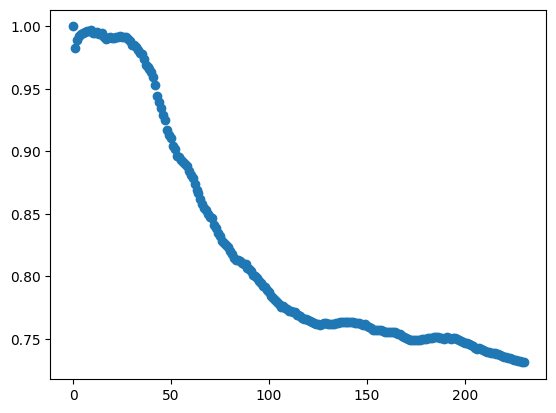

In [8]:
plt.scatter(range(len(vals)), vals)

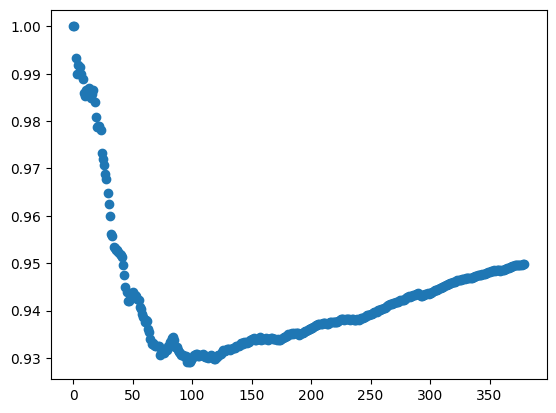

In [445]:
plt.scatter(range(len(vals)), vals)

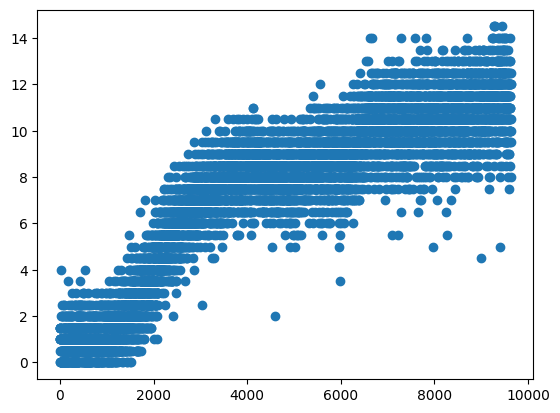

In [436]:
means = [mean(m) for m in tmp['golds']]
plt.scatter(range(len(means)), means)

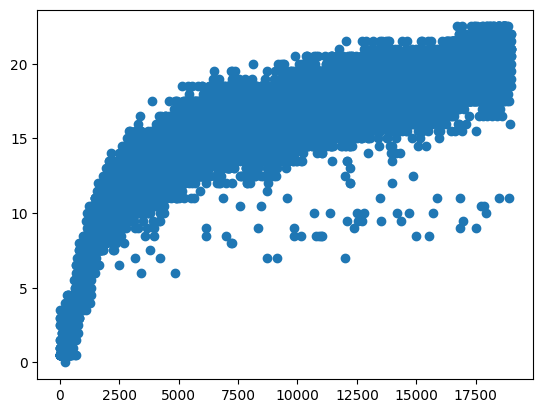

In [444]:
means = [mean(m) for m in tmp['golds']]
plt.scatter(range(len(means)), means)